In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import requests
import shutil
import bs4
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By
import cv2
import time

In [11]:
#MENCOBA SHAPE MATCHING
def bin_img(image):
    img = cv2.imread(image)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    binary_img = cv2.threshold(img_gray, 242, 255, cv2.THRESH_BINARY_INV)[1]
    plt.imshow(binary_img, cmap='gray')

    return binary_img

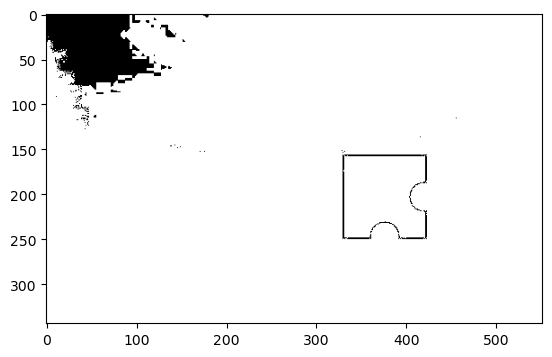

In [12]:
capt = bin_img('captcha_img.jpeg')

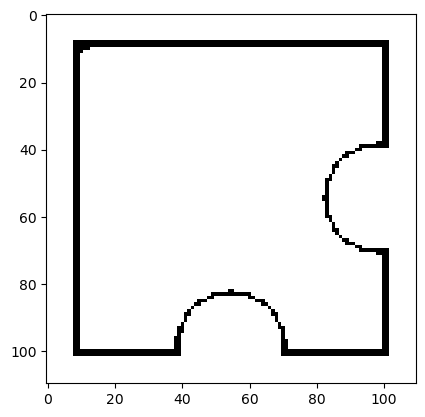

In [13]:
piece = bin_img('captcha_piece.jpeg')

In [14]:
match = cv2.matchTemplate(capt, piece, cv2.TM_CCOEFF_NORMED)

#hasil
cv2.imshow('result', match)
cv2.waitKey()
cv2.destroyAllWindows()

#cek x, y
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match)

In [15]:
print(max_loc)
print(max_val)

(322, 149)
0.9389137625694275


In [16]:
w = piece.shape[1]
h = piece.shape[0]

In [17]:
img = cv2.imread('captcha_img.jpeg')

In [18]:
cv2.rectangle(img, max_loc, (max_loc[0]+w, max_loc[1]+h), (0, 255, 255), 2)

array([[[248, 251, 255],
        [248, 251, 255],
        [248, 251, 255],
        ...,
        [225, 230, 233],
        [224, 229, 232],
        [224, 229, 232]],

       [[248, 251, 255],
        [248, 251, 255],
        [248, 251, 255],
        ...,
        [224, 229, 232],
        [224, 229, 232],
        [224, 229, 232]],

       [[248, 251, 255],
        [248, 251, 255],
        [248, 251, 255],
        ...,
        [224, 229, 232],
        [223, 228, 231],
        [223, 228, 231]],

       ...,

       [[ 62, 120, 142],
        [ 57, 114, 135],
        [ 52, 105, 126],
        ...,
        [114, 117, 125],
        [114, 117, 125],
        [114, 117, 125]],

       [[ 42, 102, 124],
        [ 46, 105, 125],
        [ 40,  95, 116],
        ...,
        [113, 116, 124],
        [113, 116, 124],
        [113, 116, 124]],

       [[ 18,  78, 100],
        [ 31,  90, 110],
        [ 33,  90, 111],
        ...,
        [113, 116, 124],
        [113, 116, 124],
        [113, 116, 124]]

In [19]:
cv2.imshow('jawab', img)
cv2.waitKey()
cv2.destroyAllWindows()